In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [41]:
train.shape, test.shape

((614, 13), (367, 12))

In [42]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index=True)

In [43]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [44]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [45]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [46]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [47]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.00000,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.00000,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.00000,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.00000,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.00000,Urban,Y,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.00000,360.0,1.00000,Urban,NaN,test
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.00000,360.0,1.00000,Urban,NaN,test
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.00000,360.0,0.83592,Semiurban,NaN,test
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.00000,360.0,1.00000,Rural,NaN,test


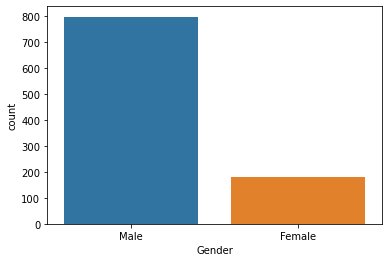

In [48]:
sns.countplot(data['Gender'])

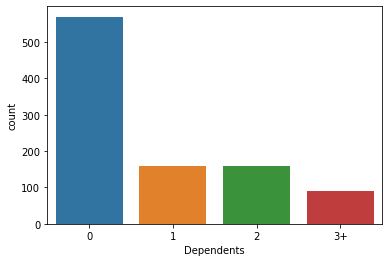

In [49]:
sns.countplot(data['Dependents'])

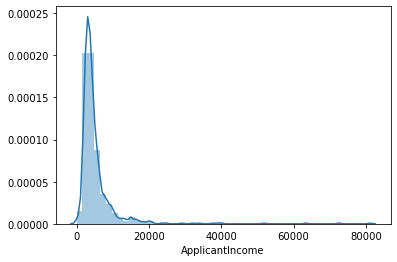

In [50]:
sns.distplot(data['ApplicantIncome'])

In [51]:
data['Total_Income']=data['ApplicantIncome'] + data['CoapplicantIncome']

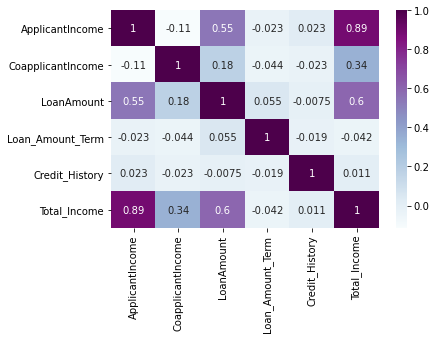

In [52]:
sns.heatmap(data.corr(),annot=True, cmap='BuPu')

In [53]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# Drop unnecessary columns:
test.drop(['Loan_Status','source', 'CoapplicantIncome'],axis=1,inplace=True)
train.drop(['source', 'CoapplicantIncome'],axis=1,inplace=True)

In [54]:
train.drop('Loan_ID',axis=1,inplace=True)
test.drop("Loan_ID",axis=1,inplace = True)

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [57]:
train.Education = train.Education.map({'Graduate':1, 'Not Graduate':0})
test.Education = test.Education.map({'Graduate':1, 'Not Graduate':0})

In [58]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,5849,142.51153,360.0,1.0,2,Y,5849.0
1,1,1,1,1,0,4583,128.00000,360.0,1.0,0,N,6091.0
2,1,1,0,1,1,3000,66.00000,360.0,1.0,2,Y,3000.0
3,1,1,0,0,0,2583,120.00000,360.0,1.0,2,Y,4941.0
4,1,0,0,1,0,6000,141.00000,360.0,1.0,2,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,71.00000,360.0,1.0,0,Y,2900.0
610,1,1,3,1,0,4106,40.00000,180.0,1.0,0,Y,4106.0
611,1,1,1,1,0,8072,253.00000,360.0,1.0,2,Y,8312.0
612,1,1,2,1,0,7583,187.00000,360.0,1.0,2,Y,7583.0


In [59]:
train.Loan_Status = le.fit_transform(train.Loan_Status)

In [60]:
X = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

In [61]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [63]:
models = []
models.append(('Logistic', LogisticRegression()))
models.append(('LightGBM', LGBMClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('Forest', RandomForestClassifier()))
models.append(('Boost', XGBClassifier()))
models.append(('Bayes', GaussianNB()))
models.append(('Neighbor', KNeighborsClassifier()))
models.append(('Hist', HistGradientBoostingClassifier()))
models.append(('Ada', AdaBoostClassifier()))

In [64]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("ROC~AUC score for", name, ":", metrics.accuracy_score(y_test, y_pred))

ROC~AUC score for Logistic : 0.8378378378378378
ROC~AUC score for LightGBM : 0.7891891891891892
ROC~AUC score for Tree : 0.6594594594594595
ROC~AUC score for Forest : 0.8054054054054054
[01:06:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC~AUC score for Boost : 0.7783783783783784
ROC~AUC score for Bayes : 0.827027027027027
ROC~AUC score for Neighbor : 0.6324324324324324
ROC~AUC score for Hist : 0.772972972972973
ROC~AUC score for Ada : 0.7945945945945946


In [65]:
sample_submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [66]:
sample_submission['Loan_Status'] = (models[0][1].predict(test) + models[5][1].predict(test))/2

In [67]:
sample_submission.Loan_Status = sample_submission.Loan_Status.map({1:'Y', 0:'N', 0.5:'Y'})
sample_submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [69]:
sample_submission.to_csv(f'submission.csv',index=False)